# PIK3CA: Effects of Hotspot Mutation on MTOR

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.stats.multitest

### Import CPTAC

In [2]:
import CPTAC

Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

In [4]:
protein = 'MTOR'
gene = 'PIK3CA'

## Extract the data for hotspot mutations only 

In [5]:
#A list of mutations present in the hotspot according to our Hotspot3D output
hotspot_mutations = ['p.E545A', 'p.E545K', 'p.E545V', 'p.Q546P', 'p.Q546R', 'p.E542K']
mutated_hotspot = somatic.loc[(somatic['Location'].isin(hotspot_mutations)) & (somatic['Gene'] == gene)]
hotspot_patients = mutated_hotspot['Clinical_Patient_Key']

In [6]:
p10_mutations = CPTAC.compare_mutations(proteomics, protein, gene)
#print(p10_mutations)
p10_mutations['Within_Hotspot'] = False
p10_mutations.loc[hotspot_patients, 'Within_Hotspot'] = True
p10_mutations.loc[p10_mutations['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
p10_mutations = p10_mutations.loc[p10_mutations['Patient_Type'] == 'Tumor'].dropna(axis=0)
print(len(p10_mutations.loc[(p10_mutations['Within_Hotspot'] == True)]))

19


## Hotspot mutation vs non-hotspot mutation

In [7]:
in_hotspot = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
out_hotspot = p10_mutations.loc[p10_mutations['Within_Hotspot'] == False]
ttest = scipy.stats.ttest_ind(in_hotspot[protein], out_hotspot[protein])
print(ttest)

Ttest_indResult(statistic=-1.4830274581724552, pvalue=0.14590401443193632)


## Hotspot mutation vs other mutations and wildtype

In [8]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] != True]
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=-2.5602996351741565, pvalue=0.011984941649310327)


## All mutations vs wildtype

In [9]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] != 'Wildtype']
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == 'Wildtype']
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=-1.960379456967061, pvalue=0.05279090202612725)


## Hotspot mutation v wildtype

In [10]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == 'Wildtype']
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=-2.576790176744144, pvalue=0.011936819561692015)


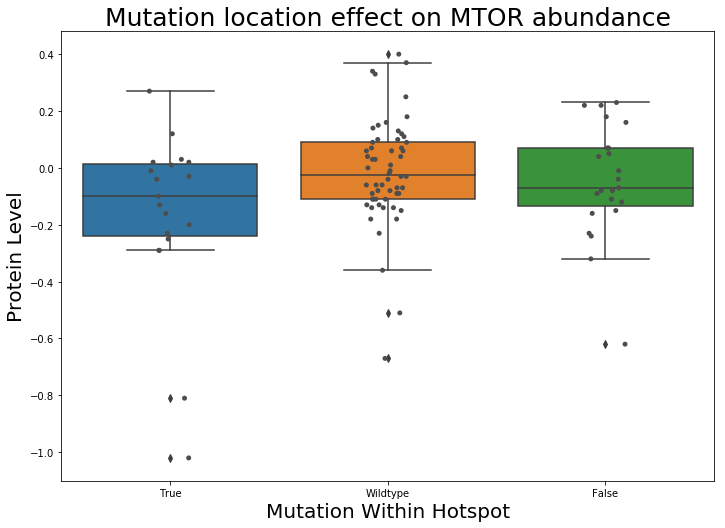

In [11]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = p10_mutations, x = 'Within_Hotspot', y = protein, ax = ax)
boxplt = sns.stripplot(data = p10_mutations, x = 'Within_Hotspot', y = protein, jitter = True, color = '.3')
boxplt.set_title('Mutation location effect on MTOR abundance', fontsize='25')
boxplt.set_xlabel('Mutation Within Hotspot', fontsize='20')
boxplt.set_ylabel('Protein Level', fontsize='20')
plt.show()

# Phosphoproteomic Abundance

In [12]:
phos_mutations = CPTAC.compare_mutations(phos, protein, gene)
phos_mutations['Within_Hotspot'] = False
phos_mutations.loc[hotspot_patients, 'Within_Hotspot'] = True

phos_mutations.loc[phos_mutations['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
print(phos_mutations)


phos_mutations = phos_mutations.loc[phos_mutations['Patient_Type'] == 'Tumor']
#phos_mutations = phos_mutations.dropna(axis = 0)
#print(phos_mutations)
phos_sites = list(phos_mutations)
phos_sites = phos_sites[:(len(phos_sites) - 3)]

      LAMTOR1-S27  LAMTOR1-S42  LAMTOR1-S63  LAMTOR1-T61  MTOR-S1261  \
S001        -0.26        -1.76         0.49         0.41        0.54   
S002         0.88         0.18         0.53          NaN         NaN   
S003         0.56          NaN         0.75          NaN        0.02   
S004        -0.11         0.07         0.41          NaN        0.02   
S005        -0.20          NaN          NaN         0.86        0.37   
S006        -0.36         0.50         0.09          NaN         NaN   
S007        -0.21        -0.13          NaN        -0.11       -0.33   
S008        -0.34         0.25         0.65          NaN        0.43   
S009        -0.40          NaN          NaN         1.14        0.10   
S010         0.14        -0.44         0.39          NaN        0.09   
S011         1.01         0.36          NaN         0.39       -0.63   
S012         1.28         0.92          NaN        -0.26         NaN   
S013         1.11        -0.58          NaN        -0.60        

## Hotspot mutation vs non-hotspot mutation

In [13]:
for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] == True]
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] == False]
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print("Test for " + site, ttest)

Test for LAMTOR1-S27 Ttest_indResult(statistic=-2.3434992707545277, pvalue=0.02491193672440336)
Test for LAMTOR1-S42 Ttest_indResult(statistic=-1.2135546377792397, pvalue=0.23353249811491122)
Test for LAMTOR1-S63 Ttest_indResult(statistic=0.563617706726816, pvalue=0.5782431674174349)
Test for LAMTOR1-T61 Ttest_indResult(statistic=-0.21403468609328163, pvalue=0.8325845456060927)
Test for MTOR-S1261 Ttest_indResult(statistic=-1.3399446942661626, pvalue=0.19103696285415026)
Test for MTOR-S2481 Ttest_indResult(statistic=-1.4823947446932986, pvalue=0.15073214745131305)


## Hotspot mutation vs other mutations and wildtype

In [14]:
for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] == True]
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] != True]
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print("Test for " + site, ttest)

Test for LAMTOR1-S27 Ttest_indResult(statistic=-0.4301196401355535, pvalue=0.6681483106131747)
Test for LAMTOR1-S42 Ttest_indResult(statistic=-1.9218835813287287, pvalue=0.05818099272974264)
Test for LAMTOR1-S63 Ttest_indResult(statistic=0.3157674465008391, pvalue=0.7532064791320249)
Test for LAMTOR1-T61 Ttest_indResult(statistic=-1.1537343372837607, pvalue=0.2542056621485752)
Test for MTOR-S1261 Ttest_indResult(statistic=-1.4393358716672637, pvalue=0.15478152492976194)
Test for MTOR-S2481 Ttest_indResult(statistic=-1.0376459846611128, pvalue=0.3041459453856632)


## All mutations vs wildtype

In [15]:
for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] != 'Wildtype']
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] == 'Wildtype']
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print("Test for " + site, ttest)

Test for LAMTOR1-S27 Ttest_indResult(statistic=1.4647927181850036, pvalue=0.14650113343411417)
Test for LAMTOR1-S42 Ttest_indResult(statistic=-1.5867429446591779, pvalue=0.11651582303419854)
Test for LAMTOR1-S63 Ttest_indResult(statistic=-0.44913502747942546, pvalue=0.6548515072872769)
Test for LAMTOR1-T61 Ttest_indResult(statistic=-1.720835960813503, pvalue=0.09159019625166837)
Test for MTOR-S1261 Ttest_indResult(statistic=-0.4169791296901005, pvalue=0.6780468399140362)
Test for MTOR-S2481 Ttest_indResult(statistic=0.2914471204189483, pvalue=0.7718470306095397)


## Hotspot mutation v wildtype

In [16]:
for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] == True]
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] == 'Wildtype']
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print("Test for " + site, ttest)

Test for LAMTOR1-S27 Ttest_indResult(statistic=0.122977175624656, pvalue=0.902477578042314)
Test for LAMTOR1-S42 Ttest_indResult(statistic=-1.9754999686062091, pvalue=0.05281637807940892)
Test for LAMTOR1-S63 Ttest_indResult(statistic=0.1325647327286417, pvalue=0.8950696855440154)
Test for LAMTOR1-T61 Ttest_indResult(statistic=-1.3707870512171372, pvalue=0.17870003511909532)
Test for MTOR-S1261 Ttest_indResult(statistic=-1.1666053954570068, pvalue=0.2485922706928217)
Test for MTOR-S2481 Ttest_indResult(statistic=-0.5988777667534125, pvalue=0.5526311731508879)
